<center> <h1> Neural Decision Tree </h1> <h3>Fatma Ridaoui </h3> </center>


make moons dataset / sklearn <p>
malicious websites <p>
housing.csv @ https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data / regression

## Imports

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn import tree
import tensorflow as tf
import seaborn as sn

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score,mean_squared_error
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.datasets import make_moons
from tabulate import tabulate
import matplotlib.pyplot as plt

#There are much warnings from tf i will ignore for visual simplicity
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Datasets & Preprocessing

#### 1 Make moons 

In [2]:
moonsX, moonsy = make_moons(n_samples=2000, noise=0.2, shuffle=True, random_state=42)
moons_X_train, moons_X_test, moons_y_train, moons_y_test = train_test_split(moonsX, moonsy, test_size=0.20, 
                                                    random_state=42, stratify=moonsy, shuffle=True)

In [51]:
moonsX, moonsy

(array([[ 1.64703896,  0.3088347 ],
        [ 0.3510386 ,  0.9650405 ],
        [ 0.49061588, -0.27061724],
        ...,
        [-0.96701302,  0.63271301],
        [ 0.80593336, -0.76011338],
        [ 0.22621047,  0.07307511]]),
 array([1, 0, 1, ..., 0, 1, 1], dtype=int64))

#### 2 housing 

In [3]:
housingdf = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = housingdf.fillna(0)
dataset = housingdf.values

# split into input (X) and output (Y) variables
housingX = dataset[:,0:13]
housingY = dataset[:,13]

In [4]:
housingX[:3], housingY[:3]

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
         6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
         1.5300e+01, 3.9690e+02, 4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9690e+02, 9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9283e+02, 4.0300e+00]]),
 array([24. , 21.6, 34.7]))

#### 3 malicious websites

In [5]:
df = pd.read_csv("datasets/malicious_websites/dataset.csv", index_col=None)
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [6]:
df.columns

Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [7]:
df.shape

(1781, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [9]:
df.fillna(method='backfill', inplace=True)

In [10]:
for col in df.columns:
    df[col] = pd.Categorical(df[col], categories=df[col].unique()).codes

In [11]:
X = df.drop(columns=['Type'])
y = df['Type']
X, y = X.values, y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42, stratify=y, shuffle=True)

In [12]:
"""scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
y = y.reshape(-1,1)
scaler = preprocessing.StandardScaler().fit(y)
y = scaler.transform(y)
y=y.reshape(-1,1)"""

'scaler = preprocessing.StandardScaler().fit(X)\nX = scaler.transform(X)\ny = y.reshape(-1,1)\nscaler = preprocessing.StandardScaler().fit(y)\ny = scaler.transform(y)\ny=y.reshape(-1,1)'

## Models

In [13]:
#sklearn MLP classifier is used to make decisions

class NeuralDecisionTreeClassifier():
    def __init__(self,
                 X=None,
                 y=None,
                 depth=1,
                 min_leaf=10,
                 threshold=0.5,
                 mlp_features_ratio=1.):
        self.X = X
        self.y = y
        self.n = 0 if X is None else X.shape[0]
        self.depth = depth
        self.min_leaf = min_leaf
        self.mlp_model = None
        self.lhs = None
        self.rhs = None
        self.threshold = threshold
        self.mlp_features_ratio = mlp_features_ratio

    def set_data(self, X, y):
        self.X = X
        self.y = y
        self.n = X.shape[0]
    
    def get_tree_depth():
        return self.depth
    
    def get_tree_min_leaves():
        return self.min_leaf
    
    def fit(self, X, y, mlp_model=MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50,)),
            threshold=0.5, split_ratio=None):
        self.mlp_model = mlp_model
        if X is not None:
            self.set_data(X, y)
            self.threshold = threshold
            self.mlp_features_indices = np.sort(np.array(
                                                         random.sample(range(X.shape[1]), k=max(2, int(np.ceil(self.mlp_features_ratio * X.shape[1]))))))
        if X.shape[0] == 0:
            return
        
        if len(y) != self.n:
            raise ValueError("Number of labels=%d does not match "
                             "number of samples=%d" % (len(y), n))
              
        mlp_model.fit(X[:, self.mlp_features_indices], y)
        
        if self.depth == 0 or self.min_leaf >= self.n:
            return
        if split_ratio is None:
            routing_probs = (mlp_model.predict_proba(X[:, self.mlp_features_indices])[:, 0] >= threshold).astype(int)
            X_left = X[np.where(routing_probs == 0)[0]]
            X_right = X[np.where(routing_probs == 1)[0]]
            y_left = y[np.where(routing_probs == 0)[0]]
            y_right = y[np.where(routing_probs == 1)[0]]
        else:
            routing_probs = mlp_model.predict_proba(X[:, self.mlp_features_indices])[:, 0]
            ord_indices = np.argsort(routing_probs)
            left_indices = ord_indices[:-int(split_ratio * X.shape[0])]
            right_indices = ord_indices[-int(split_ratio * X.shape[0]):]
            X_left = X[left_indices]
            X_right = X[right_indices]
            y_left = y[left_indices]
            y_right = y[right_indices]
        
        self.lhs = NeuralDecisionTreeClassifier(X=X_left, y=y_left, depth=self.depth - 1, min_leaf=self.min_leaf, mlp_features_ratio=self.mlp_features_ratio)
        self.rhs = NeuralDecisionTreeClassifier(X=X_right, y=y_right, depth=self.depth - 1, min_leaf=self.min_leaf, mlp_features_ratio=self.mlp_features_ratio)
        self.lhs.fit(X_left, y_left, mlp_model, threshold, split_ratio)
        self.rhs.fit(X_right, y_right, mlp_model, threshold, split_ratio)
    
    def predict(self, X):
        return np.array([self.predict_instance(X[i:i + 1, self.mlp_features_indices]) for i in range(len(X))])
    
    def predict_instance(self, X):
        output = self.mlp_model.predict(X)
        if self.depth == 1 or (self.lhs is None and self.rhs is None):
            return output
        if output <= self.threshold:
            return self.lhs.predict_instance(X)
        else:
            return self.rhs.predict_instance(X)
    
    def print_tree(self, depth = 0):
        if self is None:
            return
        print(self.X.shape[0], depth)
        if self.rhs is not None:
            self.lhs.print_tree(depth + 1)
        if self.rhs is not None:
            self.rhs.print_tree(depth + 1)

In [14]:
#MLP Regressor is used from sklearn
class NeuralDecisionTreeRegressor():
    def __init__(self,
                 X=None,
                 y=None,
                 depth=1,
                 min_leaf=10,
                 threshold=24,
                 mlp_features_ratio=1.):
        self.X = X
        self.y = y
        self.n = 0 if X is None else X.shape[0]
        self.depth = depth
        self.min_leaf = min_leaf
        self.mlp_model = None
        self.lhs = None
        self.rhs = None
        self.threshold = threshold
        self.mlp_features_ratio = mlp_features_ratio

    def set_data(self, X, y):
        self.X = X
        self.y = y
        self.n = X.shape[0]
    
    def get_tree_depth():
        return self.depth
    
    def get_tree_min_leaves():
        return self.min_leaf
    
    def fit(self, X, y, mlp_model=MLPRegressor(solver='lbfgs', hidden_layer_sizes=(50,)),
            threshold=0.5, split_ratio=None):
        self.mlp_model = mlp_model
        if X is not None:
            self.set_data(X, y)
            self.threshold = threshold
            self.mlp_features_indices = np.sort(np.array(
                                                         random.sample(range(X.shape[1]), k=max(2, int(np.ceil(self.mlp_features_ratio * X.shape[1]))))))
        if X.shape[0] == 0:
            return
        
        if len(y) != self.n:
            raise ValueError("Number of labels=%d does not match "
                             "number of samples=%d" % (len(y), n))
              
        mlp_model.fit(X[:, self.mlp_features_indices], y)
        
        if self.depth == 0 or self.min_leaf >= self.n:
            return
       
     
        routing_probs = mlp_model.score(X[:, self.mlp_features_indices],y)
        ord_indices = np.argsort(routing_probs)
        left_indices = ord_indices[:-int(split_ratio * X.shape[0])]
        right_indices = ord_indices[-int(split_ratio * X.shape[0]):]
        X_left = X[left_indices]
        X_right = X[right_indices]
        y_left = y[left_indices]
        y_right = y[right_indices]
        
        self.lhs = NeuralDecisionTreeRegressor(X=X_left, y=y_left, depth=self.depth - 1, min_leaf=self.min_leaf, mlp_features_ratio=self.mlp_features_ratio)
        self.rhs = NeuralDecisionTreeRegressor(X=X_right, y=y_right, depth=self.depth - 1, min_leaf=self.min_leaf, mlp_features_ratio=self.mlp_features_ratio)
        self.lhs.fit(X_left, y_left, mlp_model, threshold, split_ratio)
        self.rhs.fit(X_right, y_right, mlp_model, threshold, split_ratio)
    
    def predict(self, X):
        return np.array([self.predict_instance(X[i:i + 1, self.mlp_features_indices]) for i in range(len(X))])
    
    def predict_instance(self, X):
        output = self.mlp_model.predict(X)
        if self.depth == 1 or (self.lhs is None and self.rhs is None):
            return output
        if output <= self.threshold:
            return self.lhs.predict_instance(X)
        else:
            return self.rhs.predict_instance(X)
    
    def print_tree(self, depth = 0):
        if self is None:
            return
        print(self.X.shape[0], depth)
        if self.rhs is not None:
            self.lhs.print_tree(depth + 1)
        if self.rhs is not None:
            self.rhs.print_tree(depth + 1)

# Tests

#### NDTC  

In [15]:
malicious_ndtc_depth = 3
malicious_ndtc_hid = 50
ndtc = NeuralDecisionTreeClassifier(depth=malicious_ndtc_depth )

In [16]:
ndtc.fit(X_train, y_train,
         mlp_model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(malicious_ndtc_hid,)), 
         threshold=0.5, split_ratio=0.95)

In [17]:
ndtc_train_acc = accuracy_score(ndtc.predict(X_train), y_train)
ndtc_test_acc = accuracy_score(ndtc.predict(X_test), y_test)
print("Train accuracy:", ndtc_train_acc)
print("Test accuracy:", ndtc_test_acc)

Train accuracy: 0.9578651685393258
Test accuracy: 0.938375350140056


#### RFC and DTC 

In [18]:
classifiers_depth =3
models = {'RandomForestClassifier' : RandomForestClassifier(max_depth=classifiers_depth, n_estimators=10),
         'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=classifiers_depth)}

In [19]:
rfc_dtc = []
i=0
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    train_preds = model.predict(X_train)
    rfc_dtc.append([accuracy_score(preds, y_test),accuracy_score(train_preds, y_train),name])
    print(name, 'train accuracy score:',rfc_dtc[i][0] )
    print(name, 'test accuracy score:', rfc_dtc[i][1])
    i=i+1

RandomForestClassifier train accuracy score: 0.9187675070028011
RandomForestClassifier test accuracy score: 0.9143258426966292
DecisionTreeClassifier train accuracy score: 0.9355742296918768
DecisionTreeClassifier test accuracy score: 0.9360955056179775


#### MLP CLASSIFIER

In [20]:
""" 
lbfgs — Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. It approximates the second derivative
matrix updates with gradient evaluations. It stores only the last few updates, so it saves memory. 
It isn't super fast with large data sets.
"""
mlp_hid =50
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(mlp_hid), random_state=42)
mlp_clf.fit(X_train, y_train)

mlp_test_acc = accuracy_score(mlp_clf.predict(X_test), y_test)
mlp_train_acc = accuracy_score(mlp_clf.predict(X_train), y_train)
print("Test accuracy:", mlp_test_acc )
print("Train accuracy:", mlp_train_acc )

Test accuracy: 0.938375350140056
Train accuracy: 0.9445224719101124


#### cross validation score for mlp classifier

In [21]:
fold = 10
MLP_CV = cross_val_score(mlp_clf, X, y, cv=fold)
MLP_CV

array([0.84357542, 0.88202247, 0.87640449, 0.87640449, 0.87640449,
       0.87640449, 0.89325843, 0.88202247, 0.88202247, 0.78651685])

In [22]:
MLP_cv_mean = sum(MLP_CV)/fold
MLP_cv_mean

0.8675036093151716

#### NDTC 100 hidden layers

In [23]:
ndtc = NeuralDecisionTreeClassifier(depth=3)
malicious_ndtc_hid_1 =100
ndtc.fit(X_train, y_train,
         mlp_model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(malicious_ndtc_hid_1,)),
         threshold=0.5, split_ratio=0.95)

ndtc100_train_acc = accuracy_score(ndtc.predict(X_train), y_train)
ndtc100_test_acc = accuracy_score(ndtc.predict(X_test), y_test)
print("Train accuracy:", ndtc100_train_acc)
print("Test accuracy:", ndtc100_test_acc )


kfold = 4
kf = KFold(n_splits=kfold)

ndtc_err = []
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ndtc.fit(X_train, y_train, threshold=0.5, split_ratio=8)
    y_pred = ndtc.predict(X_test)
    ndtc_err.append(accuracy_score(y_test, y_pred))
mean_acc_ndtc  =sum(ndtc_err)/kfold


Train accuracy: 0.8785112359550562
Test accuracy: 0.8795518207282913


#### MLP Classifier 100

In [24]:
mlp_clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(100), random_state=42)
mlp_clf.fit(X_train, y_train)

mlp100_test_acc = accuracy_score(mlp_clf.predict(X_test), y_test)
mlp100_train_acc = accuracy_score(mlp_clf.predict(X_train), y_train)
print("Test accuracy:", mlp100_test_acc)
print("MLP Train accuracy:", mlp100_train_acc)


Test accuracy: 0.7955056179775281
MLP Train accuracy: 0.9565868263473054


In [25]:
kfold = 4
kf = KFold(n_splits=kfold)

mlp100_err = []
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mlp_clf.fit(X_train, y_train)
    y_pred = mlp_clf.predict(X_test)
    mlp100_err.append(accuracy_score(y_test, y_pred))
mean_acc_mlp100  =sum(mlp100_err)/kfold


#### NDTC depth =5 

In [26]:
ndtc = NeuralDecisionTreeClassifier(depth=5)
ndtc.fit(X_train, y_train, threshold=0.5, split_ratio=0.5)

ndtc5_test_acc = accuracy_score(ndtc.predict(X_test), y_test)
ndtc5_train_acc = accuracy_score(ndtc.predict(X_train), y_train)
print("Accuracy score on the test:",ndtc5_test_acc)
print("Accuracy score on the train:", ndtc5_train_acc)

Accuracy score on the test: 0.19101123595505617
Accuracy score on the train: 0.09805389221556886


#### RFC and DTC  depth=5

In [27]:
models = {'RandomForestClassifier' : 
          RandomForestClassifier(max_depth=5, n_estimators=10),
         'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=5)}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(name, 'test accuracy score:', accuracy_score(preds, y_test))
    
    preds = model.predict(X_train)
    print(name, 'train accuracy score:', accuracy_score(preds, y_train))

RandomForestClassifier test accuracy score: 0.8089887640449438
RandomForestClassifier train accuracy score: 0.9618263473053892
DecisionTreeClassifier test accuracy score: 0.7910112359550562
DecisionTreeClassifier train accuracy score: 0.9700598802395209


#### NDTC 100 hidden

In [28]:
mlp_clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(100), random_state=42)
mlp_clf.fit(X_train, y_train)
ndtc = NeuralDecisionTreeClassifier(depth=3)
ndtc.fit(X_train, y_train,mlp_model=mlp_clf ,threshold=0.5, split_ratio=0.95)

In [29]:
ndtc100_train_acc, ndtc100_test_acc = accuracy_score(ndtc.predict(X_train), y_train), accuracy_score(ndtc.predict(X_test), y_test)
print("Train accuracy:", ndtc100_train_acc )
print("Test accuracy:", ndtc100_test_acc )
print("NDTC recall ", recall_score(ndtc.predict(X_train), y_train))


Train accuracy: 0.9603293413173652
Test accuracy: 0.7955056179775281
NDTC recall  0.9585987261146497


In [30]:
y_pred = ndtc.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


In [31]:
tn, fp , fn, tp

(1, 84, 7, 353)

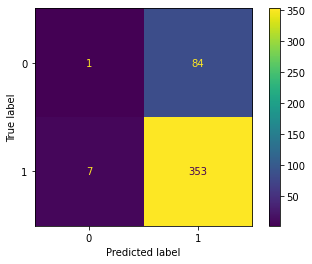

In [32]:
y_pred = ndtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

#### NDTC 100 with moons dataset

In [79]:
mlp_clf.fit(moons_X_train,moons_y_train)
ndtc.fit(moons_X_train, moons_y_train,mlp_model=mlp_clf ,threshold=0.5, split_ratio=0.95)

ndtc100_train_acc_moons, ndtc100_test_acc_moons = accuracy_score(ndtc.predict(moons_X_train), moons_y_train), accuracy_score(ndtc.predict(moons_X_test), moons_y_test)
print("Train accuracy:", ndtc100_train_acc_moons )
print("Test accuracy:", ndtc100_test_acc_moons )


Train accuracy: 0.95625
Test accuracy: 0.94


In [80]:
y_pred = ndtc.predict(moons_X_test)
tn, fp, fn, tp = confusion_matrix(moons_y_test, y_pred).ravel()

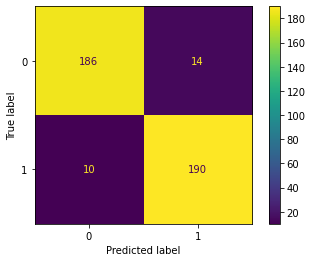

In [81]:
cm = confusion_matrix(moons_y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [82]:
kf = KFold(n_splits=4)
X= moonsX
y = moonsy
moons_cv =[]
for train_index, test_index in kf.split(moonsX):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ndtc.fit(X_train,y_train)
    y_pred = ndtc.predict(X_test)
    moons_cv.append(accuracy_score(y_test, y_pred))
moons_cv  =sum(moons_cv)/4

#### NDTC with moons + hidden layers =50

Train accuracy: 0.95625
Test accuracy: 0.94


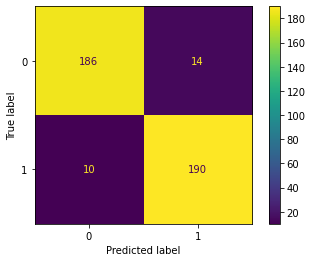

In [94]:
mlp_clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(50), random_state=42)
mlp_clf.fit(moons_X_train,moons_y_train)
ndtc.fit(moons_X_train, moons_y_train,mlp_model=mlp_clf ,threshold=0.5, split_ratio=0.95)

ndtc50_train_acc_moons, ndtc50_test_acc_moons = accuracy_score(ndtc.predict(moons_X_train), moons_y_train), accuracy_score(ndtc.predict(moons_X_test), moons_y_test)
print("Train accuracy:", ndtc50_train_acc_moons )
print("Test accuracy:", ndtc50_test_acc_moons )


y_pred = ndtc.predict(moons_X_test)
tn, fp, fn, tp = confusion_matrix(moons_y_test, y_pred).ravel()

cm = confusion_matrix(moons_y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [95]:
kf = KFold(n_splits=4)
X= moonsX
y = moonsy
moons50_cv =[]
for train_index, test_index in kf.split(moonsX):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ndtc.fit(X_train,y_train)
    y_pred = ndtc.predict(X_test)
    moons50_cv.append(accuracy_score(y_test, y_pred))
moons50_cv  =sum(moons50_cv)/4

In [96]:
moons50_cv

0.7585

# Testing Neural Decision tree Regressor

In [33]:
X = housingX
y = housingY

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
y = y.reshape(-1,1)
scaler = preprocessing.StandardScaler().fit(y)
y = scaler.transform(y)
y=y.reshape(-1,1)

X_train = X[:400]
y_train = y[:400]
X_test = X[400:500]
y_test = y[400:500]

X.shape

(506, 13)

In [34]:
ndtr = NeuralDecisionTreeRegressor(depth=3)
ndtr.fit(X_train, y_train, threshold=0.5, split_ratio=8)

In [35]:
y_pred = ndtr.predict(X_test)
ndtr_mse = mean_squared_error(y_test, y_pred)
ndtr_mse

2.453118681386701

In [36]:
print("Baseline: %.2f (%.2f) MSE" % (y_pred.mean(), y_pred.std()))
print("Baseline: %.2f (%.2f) MSE" % (y_test.mean(), y_test.std()))

Baseline: 0.52 (0.53) MSE
Baseline: -0.77 (0.58) MSE


In [37]:
#KFOLD Cross Validation for NDTR

split = 4
kf = KFold(n_splits=split)
x=np.array(housingdf)
kf.get_n_splits(x)

4

In [38]:
err = []
for train_index, test_index in kf.split(x):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ndtr.fit(X_train, y_train, threshold=0.5, split_ratio=8)
    y_pred = ndtr.predict(X_test)
    err.append(mean_squared_error(y_test, y_pred))


In [39]:
err

[0.989564610655169, 2.1571336861978976, 1.975262297329108, 1.3317534717312387]

In [40]:
MSE = (sum(err))/split
print("MSE for kfold: ", MSE)

MSE for kfold:  1.6134285164783533


#### MLP Regressor

In [41]:
regr = MLPRegressor(random_state=1,hidden_layer_sizes=(50,), max_iter=500).fit(X_train, y_train)
regr.score(X_test, y_test)
y_pred = regr.predict(X_test)

mse_mlpr =mean_squared_error(y_test, y_pred )

In [42]:
mlpr_err = []
for train_index, test_index in kf.split(x):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ndtr.fit(X_train, y_train, threshold=0.5, split_ratio=8)
    y_pred = ndtr.predict(X_test)
    mlpr_err.append(mean_squared_error(y_test, y_pred))
mlpr_err = (sum(mlpr_err))/split
print("MSE for kfold: ", mlpr_err)

MSE for kfold:  1.0142203934396186


#### DT Regressor

In [43]:
dtr = DecisionTreeRegressor(random_state=0,max_depth=5)
dtr_err = cross_val_score(dtr, X, y, cv=10)
dtr.fit(X_train,y_train)
ypred0 = dtr.predict(X_test)
mse_dtr = mean_squared_error(ypred0,y_test)
mse_cross_val = sum(dtr_err)/10
mse_cross_val

-0.07445815189598051

**RF Regressor**

In [100]:
rfr = RandomForestRegressor(random_state=0)
rfr_err = cross_val_score(rfr, X, y, cv=10)
rfr.fit(X_train,y_train)
ypred1 = rfr.predict(X_test)
mse_rfr = mean_squared_error(ypred1,y_test)
mse_cross_val_rfr = sum(rfr_err)/10
mse_cross_val_rfr

0.9006772052178608

## Report &Discussion

My results are as followed:<p>
Classifiers **dataset: Malicious Websites**

In [68]:
table = [['Model Name', 'Depth', 'Hidden Layer','Train Acc','Test Acc','Cross. val'], 
        ['NDT Classifier' ,malicious_ndtc_depth, malicious_ndtc_hid,ndtc_train_acc, ndtc_test_acc ],
        ['NDT Classifier' ,malicious_ndtc_depth, 100, ndtc100_train_acc, ndtc100_test_acc,mean_acc_ndtc ],
        ['NDT Classifier' , 5, 50, ndtc5_train_acc, ndtc5_test_acc, 0 ],
        [ rfc_dtc[0][2], classifiers_depth,0, rfc_dtc[0][0], rfc_dtc[0][1]],
        [ rfc_dtc[1][2], classifiers_depth,0, rfc_dtc[1][0], rfc_dtc[1][1]],
        ['MLP Classifier', 0, mlp_hid, mlp_train_acc, mlp_test_acc, MLP_cv_mean],
        ['MLP Classifier', 0, 100, mlp100_train_acc,mlp100_test_acc, mean_acc_mlp100],
        ['NDT Classifier_100', 0, malicious_ndtc_hid_1, ndtc100_test_acc, ndtc100_test_acc, mean_acc_ndtc]]

In [69]:
print(tabulate(table, headers='firstrow',  tablefmt='fancy_grid'))

╒════════════════════════╤═════════╤════════════════╤═════════════╤════════════╤══════════════╕
│ Model Name             │   Depth │   Hidden Layer │   Train Acc │   Test Acc │   Cross. val │
╞════════════════════════╪═════════╪════════════════╪═════════════╪════════════╪══════════════╡
│ NDT Classifier         │       3 │             50 │   0.957865  │   0.938375 │              │
├────────────────────────┼─────────┼────────────────┼─────────────┼────────────┼──────────────┤
│ NDT Classifier         │       3 │            100 │   0.960329  │   0.795506 │     0.879862 │
├────────────────────────┼─────────┼────────────────┼─────────────┼────────────┼──────────────┤
│ NDT Classifier         │       5 │             50 │   0.0980539 │   0.191011 │     0        │
├────────────────────────┼─────────┼────────────────┼─────────────┼────────────┼──────────────┤
│ RandomForestClassifier │       3 │              0 │   0.918768  │   0.914326 │              │
├────────────────────────┼─────────┼────

As we compare Neural Decision tree Classifier when we increase hidden layers from 50 to 100, train accuracy increased but test accuracy decreased, I guess that means model tends to overfit as we increase hidden layers. Increasing complexity with this dataset is not good idea since out dataset (malicious websites) is small. Maybe if we had larger dataset this value could increase.

In [97]:
table2 = [['Model Name', 'Depth', 'Hidden Layer','Train Acc','Test Acc','Cross. val'], 
        ['NDTC' ,3 , 100,ndtc100_train_acc_moons, ndtc100_test_acc_moons, moons_cv ],
         ['NDTC', 3, 50, ndtc50_train_acc_moons, ndtc50_test_acc_moons, moons50_cv]]


DATASET : moons

When we decrease hidden layer from 100 to 50, only cross val accuracy increased with moons dataset which i couldnt understand the reason...

In [98]:
print(tabulate(table2, headers='firstrow',  tablefmt='fancy_grid'))

╒══════════════╤═════════╤════════════════╤═════════════╤════════════╤══════════════╕
│ Model Name   │   Depth │   Hidden Layer │   Train Acc │   Test Acc │   Cross. val │
╞══════════════╪═════════╪════════════════╪═════════════╪════════════╪══════════════╡
│ NDTC         │       3 │            100 │     0.95625 │       0.94 │       0.7195 │
├──────────────┼─────────┼────────────────┼─────────────┼────────────┼──────────────┤
│ NDTC         │       3 │             50 │     0.95625 │       0.94 │       0.7585 │
╘══════════════╧═════════╧════════════════╧═════════════╧════════════╧══════════════╛


Regressors:<p>
**dataset : housing**

In [103]:
regression_Table = [['Model Name', 'Depth', 'Hidden Layer','MSE', 'cross val MSE'],
                    ['NDT Regressor', 3, 50, ndtr_mse, MSE ],
                    ['MLP Regressor', 0, 50, mse_mlpr, mlpr_err],
                    ['DT Regressor', 5, 0, mse_dtr, mse_cross_val ],
                    ['RF Regressor', 0, 0, mse_rfr, mse_cross_val_rfr]]

As we see in the table below, our neural decision tree gives higher mse compared to DT and MLP, RF regressor gave min among them

In [105]:
print(tabulate(regression_Table, headers='firstrow',  tablefmt='fancy_grid'))

╒═══════════════╤═════════╤════════════════╤═══════════╤═════════════════╕
│ Model Name    │   Depth │   Hidden Layer │       MSE │   cross val MSE │
╞═══════════════╪═════════╪════════════════╪═══════════╪═════════════════╡
│ NDT Regressor │       3 │             50 │ 2.45312   │       1.61343   │
├───────────────┼─────────┼────────────────┼───────────┼─────────────────┤
│ MLP Regressor │       0 │             50 │ 0.640942  │       1.01422   │
├───────────────┼─────────┼────────────────┼───────────┼─────────────────┤
│ DT Regressor  │       5 │              0 │ 0.0282708 │      -0.0744582 │
├───────────────┼─────────┼────────────────┼───────────┼─────────────────┤
│ RF Regressor  │       0 │              0 │ 0.0282708 │       0.900677  │
╘═══════════════╧═════════╧════════════════╧═══════════╧═════════════════╛
